# Visualization of 2019 Bay Wheels Ride
## by Youssef Farahat

## Investigation Overview

> In this investigation, I wanted to look at to the user behaviour characteristics, I focused on weekday, user age, user gender, trip duration, and user type to analyze and understand the usage of bike When, Who, How?


## Dataset Overview

> The forgobike trip data are nearly 180,000 rides that happend in Feburary 2019

In [16]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [17]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('cleaned_data.csv')
df.head()

,duration_minute,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_age,member_gender,bike_share_for_all_trip,start_date,weekday,is_weekend
0,29.100000,2019-02-18 09:03:06.345,2019-02-18 09:32:13.098,345.0,Hubbell St at 16th St,37.766483,-122.398279,345.0,Hubbell St at 16th St,37.766483,-122.398279,6222,Customer,54.0,Male,No,18,Monday,Weekday
1,3.450000,2019-02-18 18:36:27.321,2019-02-18 18:39:54.322,315.0,Market St at 45th St,37.834174,-122.272968,152.0,47th St at San Pablo Ave,37.835632,-122.281051,4548,Subscriber,21.0,Male,Yes,18,Monday,Weekday
2,3.300000,2019-02-18 18:37:02.491,2019-02-18 18:40:21.442,97.0,14th St at Mission St,37.768265,-122.420110,99.0,Folsom St at 15th St,37.767037,-122.415442,1882,Subscriber,28.0,Female,No,18,Monday,Weekday
3,14.066667,2019-02-18 18:26:21.963,2019-02-18 18:40:26.005,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,369.0,Hyde St at Post St,37.787349,-122.416651,4742,Subscriber,31.0,Male,No,18,Monday,Weekday
4,6.300000,2019-02-18 18:34:20.960,2019-02-18 18:40:39.858,144.0,Precita Park,37.747300,-122.411403,129.0,Harrison St at 20th St,37.758862,-122.412544,5462,Subscriber,34.0,Male,No,18,Monday,Weekday


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> The average trip duration was around 12 minutes yet there are trips above 100 which led to making the plot unreadable.  

> So we should do data transformation to make it easier to read and interpret the data. Below are the plots before/after data transformation.

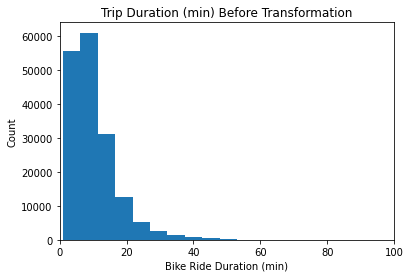

In [18]:
plt.hist(data = df, x = 'duration_minute');
plt.xlim(0, 100);
plt.xlabel("Bike Ride Duration (min)");
plt.ylabel("Count");
plt.title("Trip Duration (min) Before Transformation");

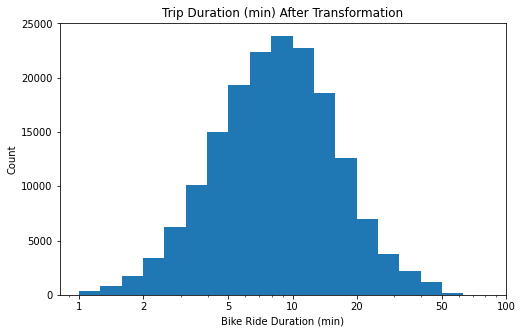

In [19]:
bins = 10 ** np.arange(0, np.log10(df['duration_minute'].max())+0.1, 0.1)

plt.figure(figsize=[8, 5]);
plt.hist(data = df, x = 'duration_minute', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
plt.xlabel("Bike Ride Duration (min)");
plt.ylabel("Count");
plt.title("Trip Duration (min) After Transformation");

## (Visualization 2)

> Based on our data we have three gender male, female and other. In the next visualization I will show the number of bike rides for each day based on gender

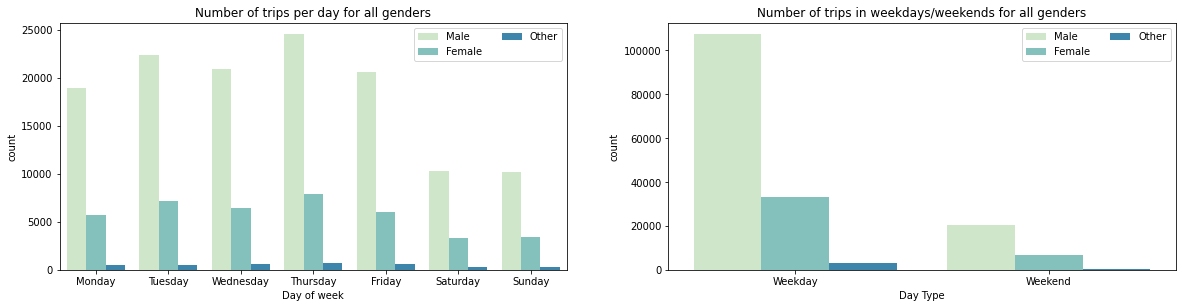

In [20]:
plt.figure(figsize = [20, 10]);

ax = plt.subplot(2, 2, 1);
sb.countplot(data = df, x = 'weekday', hue = 'member_gender', palette = 'GnBu');
ax.legend(loc = 1, ncol = 2);
ax.set_xlabel('Day of week')
plt.title('Number of trips per day for all genders')

ax = plt.subplot(2, 2, 2);
sb.countplot(data = df, x = 'is_weekend', hue = 'member_gender', palette = 'GnBu');
ax.legend(ncol = 2);
ax.set_xlabel('Day Type')
plt.title('Number of trips in weekdays/weekends for all genders');


## (Visualization 3)

Based on our data we have two user types. Subscriber, Customer. In the next visualization I will show the number of bike rides for each day based on type

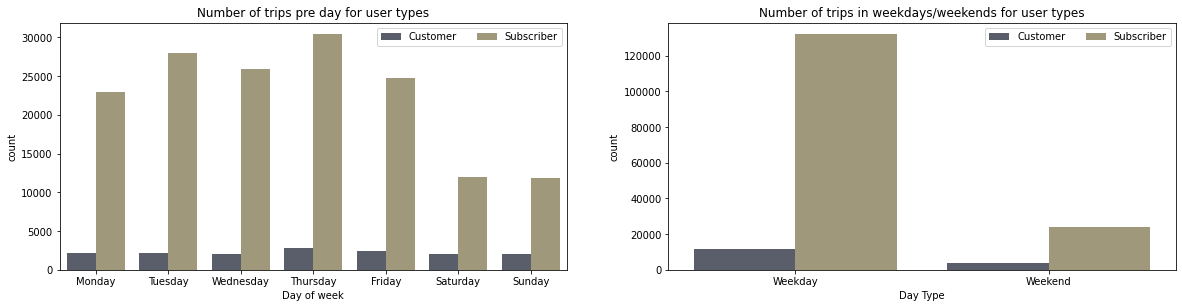

In [22]:
plt.figure(figsize = [20, 10]);

ax = plt.subplot(2, 2, 1)
sb.countplot(data = df, x = 'weekday', hue = 'user_type', palette = 'cividis')
ax.legend(loc = 1, ncol = 2)
ax.set_xlabel('Day of week')
plt.title('Number of trips pre day for user types');

ax = plt.subplot(2, 2, 2)
sb.countplot(data = df, x = 'is_weekend', hue = 'user_type', palette = 'cividis');
ax.legend(loc = 1, ncol = 2)
ax.set_xlabel('Day Type')
plt.title('Number of trips in weekdays/weekends for user types');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!